
# Music Genre Classification Project with PCA and Logistic Regression
**Predict music genres from a dataset containing audio features extracted from tracks. Some data entries lack genre labels, and the goal is to classify these unlabeled tracks using machine learning.**
**Approach:**

   > 1. Dimensionality Reduction with PCA: Simplifies the data by transforming features into principal components, reducing noise and highlighting key patterns.
  
  >  2. Logistic Regression: A supervised model used to classify tracks into genres based on the principal components.

**This project demonstrates how music data analysis can be enhanced using machine learning techniques, paving the way for applications like music recommendations and playlist organization**.

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Exploration

In [11]:
DataFrame = pd.read_csv('/kaggle/input/music-genre-files/music_dataset_mod.csv')
df_music = DataFrame.copy()
df_music.shape

(1000, 13)

In [12]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [13]:
# We see that there are 110 rows with unknown genres
missing_values = df_music.isnull().sum()
print(missing_values[missing_values > 0])  


Genre    110
dtype: int64


In [14]:
# Explore how many genres are there in the target column
unique_genre = df_music['Genre'].unique()
num_unique_genre = len(unique_genre)
    
print(f'Number of unique music genre: {num_unique_genre}')
print('Unique genres:', unique_genre)

Number of unique music genre: 6
Unique genres: ['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']


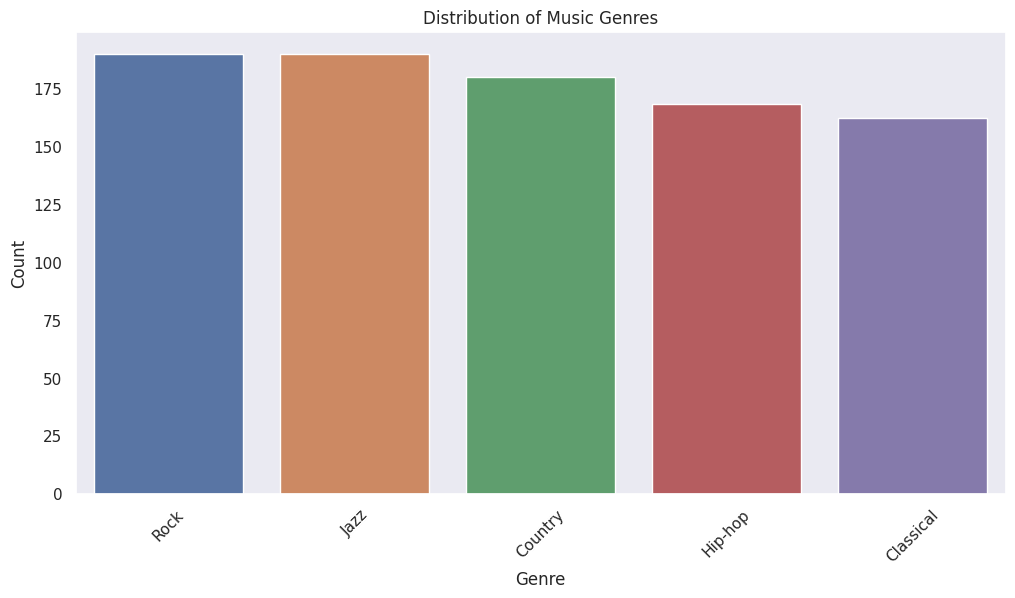

In [15]:
# Distribution of Music Genres
plt.figure(figsize=(12, 6))
sns.countplot(data=df_music, x='Genre', order=df_music['Genre'].value_counts().index)
    
# Set the title and labels
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
    
# Show the plot
plt.show()

# Correlation Analysis

In [16]:
# Drop the Unknown Value
df_music_nonull = df_music.dropna()

In [18]:
# Split the dataset into features and target
X = df_music_nonull.drop(columns=['Genre'])  # Features: all columns except Genre
y = df_music_nonull['Genre']                  # Target: Genre column

# Display the shapes of X and y
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

Features shape (X): (890, 12)
Target shape (y): (890,)


In [19]:
# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [22]:
df_encoded_genre = df_music_nonull.copy() 
df_encoded_genre.drop(columns=['Genre'],inplace=True)
df_encoded_genre['Gener_encoded'] = y_encoded
df_encoded_genre.head()


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Gener_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


In [24]:
# Calculate the correlation matrix for the dataframe with numeric Genre values

correlation_matrix = df_encoded_genre.corr()



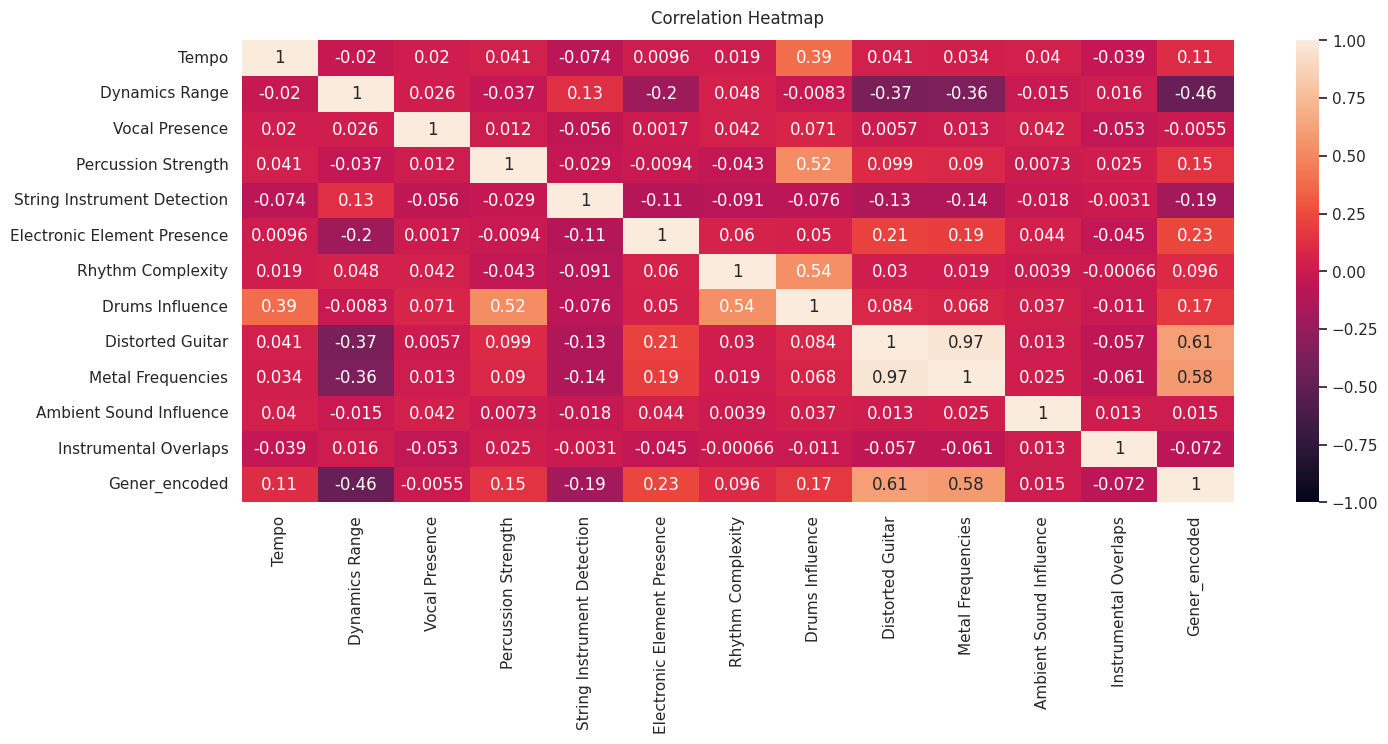

In [25]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(correlation_matrix , vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# PCA for Dimensionality Reduction

In [26]:
# Standartize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
X_scaled


array([[-0.32276419,  0.63236264,  0.05320844, ...,  0.76493507,
         1.53633887,  0.16037718],
       [-0.21834523,  1.26791613,  1.52189513, ..., -1.4654764 ,
        -1.15313543, -1.16143819],
       [ 0.37404526,  0.35132812,  0.48306804, ...,  1.26039216,
         1.49165303, -0.81044425],
       ...,
       [ 0.03876913,  0.26524849, -0.61672579, ...,  1.51998929,
        -1.55523377,  0.8709389 ],
       [-1.2146319 , -1.52681996,  0.37815922, ...,  0.24787354,
        -1.00171631, -0.83061884],
       [-2.53711957, -0.76059346,  0.38551088, ..., -0.07983057,
         1.23101564,  0.9959692 ]])

In [28]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca)


In [19]:
# Calculate and display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio for each component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.4f}")


Explained Variance Ratio for each component:
Principal Component 1: 0.2006
Principal Component 2: 0.1506
Principal Component 3: 0.0937
Principal Component 4: 0.0870
Principal Component 5: 0.0854
Principal Component 6: 0.0817
Principal Component 7: 0.0795
Principal Component 8: 0.0761
Principal Component 9: 0.0700
Principal Component 10: 0.0600
Principal Component 11: 0.0127
Principal Component 12: 0.0028


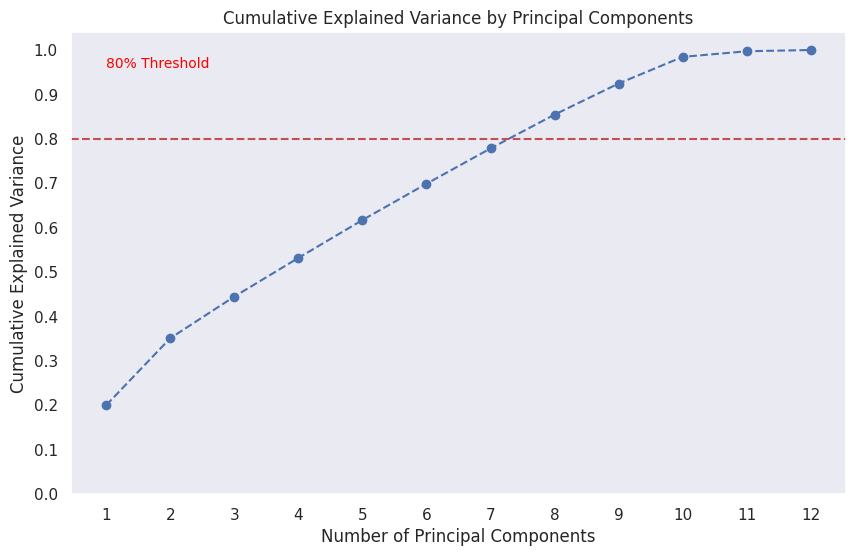

In [20]:
# Calculate cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Visualize cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.yticks([i / 10.0 for i in range(11)])  # Set y-ticks from 0 to 1 in increments of 0.1
plt.grid()
plt.axhline(y=0.80, color='r', linestyle='--')  # Line for 80% variance threshold
plt.text(1, 0.96, '80% Threshold', color='red', fontsize=10)
plt.show()

In [29]:
# Given the PCA results, we can use the first eight principal components
pca_selected = PCA(n_components=8)
X_pca = pca_selected.fit_transform(X_scaled)

# Convert the transformed data to a DataFrame for easier viewing
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(8)])

# Display the resulting DataFrame with the selected principal components
X_pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.057260,0.281616,0.623422,0.735745,-1.293288,1.054393,0.249949,-0.271587
1,1.864542,2.723895,-0.061109,0.923268,1.779717,1.346512,1.061424,0.170341
2,-1.861973,0.039077,0.306394,1.912146,-1.217001,0.293621,0.668750,0.491388
3,-1.548107,-0.999450,-0.235448,-1.455017,-2.194899,-0.755390,-0.819764,-0.476381
4,0.850767,0.573042,0.509150,2.192870,0.401860,0.511776,-0.191877,-0.068358


# Evaluating Classification Efficacy: PCA-Transformed vs. Original Data

# Logistic Regression with PCs

In [32]:
df_unknown_genre = df_music[df_music['Genre'].isnull()].copy()
df_unknown_genre.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN


In [51]:
# Split the data into training and testing sets with a 30% test size
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

In [52]:
# Initialize the Logistic Regression classifier
classifier = LogisticRegression(max_iter=10000)
# Train the model on the training data
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [53]:
# Predict and evaluate the model
y_pred = classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model with PCA : {accuracy:.4f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression model with PCA : 0.5356

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



# Logistic Regression with Original Features

In [41]:
# Split the original data into training and testing sets with a 30% test size
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)


In [42]:
# Initialize the Logistic Regression classifier
Logreg_Orig = LogisticRegression(max_iter=10000)
# Train the model on the training data
Logreg_Orig.fit(X_train_orig, y_train_orig)


LogisticRegression(max_iter=10000)

In [47]:
y_pred_orig = Logreg_Orig.predict(X_test_orig)

# Evaluate the model's accuracy
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f"Accuracy with Original Features: {accuracy_orig:.4f}")

# Generate a classification report
print("\nClassification Report with Original Features:")
print(classification_report(y_test_orig, y_pred_orig))

Accuracy with Original Features: 0.5281

Classification Report with Original Features:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.33      0.25      0.28        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



# Genre Prediction and Integration

In [48]:
df_unknown_genre = df_music[df_music['Genre'].isnull()].copy()
df_unknown_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [57]:
# Prepare the data for prediction
X_unknown = df_unknown_genre.drop(columns=['Genre'])
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca_selected.transform(X_unknown_scaled)

# Predict the genres
y_unknown_pred = classifier.predict(X_unknown_pca)

In [59]:
# Assign the predicted genres back to the DataFrame
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)
df_unknown_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre,Predicted_Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN,Classical
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN,Country
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN,Country
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN,Rock
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN,Hip-hop


In [60]:
# Display the DataFramewith Predicted Genres for unknown Values: 
print(df_unknown_genre[['Predicted_Genre']])


    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]


In [62]:
predicted_genres_label = df_unknown_genre['Predicted_Genre']
predicted_genres_label

13     Classical
18       Country
22       Country
31          Rock
42          Rock
         ...    
991      Hip-hop
992         Rock
993      Hip-hop
994      Hip-hop
995    Classical
Name: Predicted_Genre, Length: 110, dtype: object

In [63]:
Final_data = DataFrame.copy()
unknown_genre_indices = Final_data [Final_data ['Genre'].isnull()].index
Final_data .loc[unknown_genre_indices, 'Genre'] = predicted_genres_label


In [65]:
# Confirm that missing values in 'Genre' are filled
print("Updated Original DataFrame with Predicted Genres for Missing Values:")
print(Final_data .loc[unknown_genre_indices, ['Genre']])

Updated Original DataFrame with Predicted Genres for Missing Values:
         Genre
13   Classical
18     Country
22     Country
31        Rock
42        Rock
..         ...
991    Hip-hop
992       Rock
993    Hip-hop
994    Hip-hop
995  Classical

[110 rows x 1 columns]


In [66]:
remaining_missing = Final_data ['Genre'].isnull().sum()
print(f"\nRemaining missing values in 'Genre': {remaining_missing}")



Remaining missing values in 'Genre': 0


In [72]:
Final_data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
990,145.665597,28.642070,52.657254,7.204516,94.165273,7.130571,78.159682,73.616978,94.777354,93.121865,46.236654,77.689609,Jazz
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Hip-hop
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock
999,71.050781,32.967250,62.875776,78.868747,88.094454,59.148014,83.420324,59.582109,37.329193,44.576693,87.458414,78.270683,Jazz


In [73]:
# Method 1
# Assuming  the original DataFrame and track number 992 is indexed as 992
# Check if track 992 is in the subset of rows with missing genres
if 992 in unknown_genre_indices:
    # Extract the features for track 992 from the PCA-transformed dataset used for predictions
    track_992_features = X_unknown_pca[unknown_genre_indices.get_loc(992)].reshape(1, -1)

    # Predict the genre for track 992 using the model
    predicted_genre_encoded = classifier.predict(track_992_features)

    # Convert the numeric label back to the original genre name
    predicted_genre = le.inverse_transform(predicted_genre_encoded)[0]
    
    print(f"The predicted genre for track number 992 is: {predicted_genre}")
else:
    print("Track 992 does not have a missing genre in the original DataFrame.")


The predicted genre for track number 992 is: Rock


In [81]:
# Method 2
Final_data.iloc[992]

# The predicted genre for track number 992 is Rock

Tempo                          117.892313
Dynamics Range                  35.001524
Vocal Presence                  76.506358
Percussion Strength              77.97257
String Instrument Detection     80.765657
Electronic Element Presence     13.759213
Rhythm Complexity               59.985923
Drums Influence                 80.108786
Distorted Guitar                93.831262
Metal Frequencies                   100.0
Ambient Sound Influence         15.851851
Instrumental Overlaps           47.984445
Genre                                Rock
Name: 992, dtype: object